In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,x,y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


In [23]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

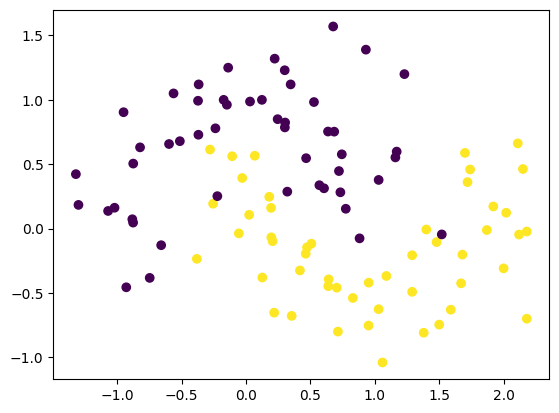

In [24]:
plt.scatter(x[:,0],x[:,1],c=y)

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [29]:
clf.fit(x,y)

LogisticRegression()

<AxesSubplot: >

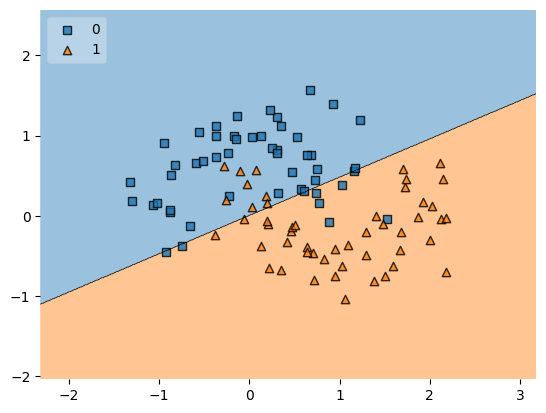

In [31]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [32]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.8300000000000001

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [34]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.9

In [35]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

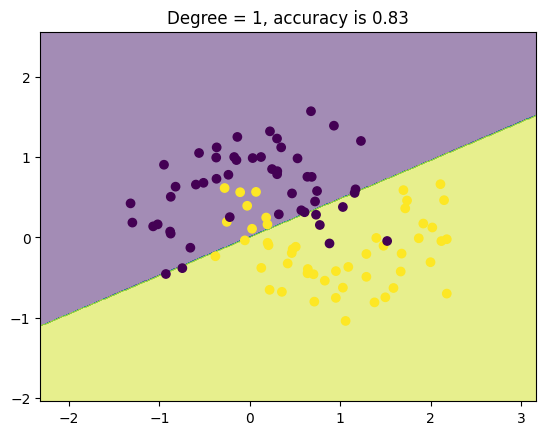

In [36]:
plot_decision_boundary(X,y)

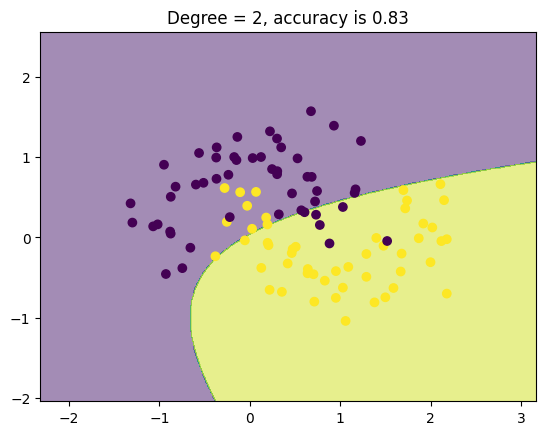

In [37]:
plot_decision_boundary(X,y,degree=2)

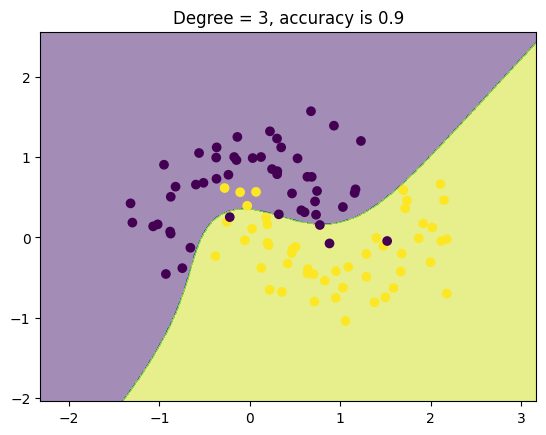

In [38]:
plot_decision_boundary(X,y,degree=3)